<a href="https://colab.research.google.com/github/SihomaSa/Angular/blob/main/Predicci%C3%B3n_de_Accidentes_de_Tr%C3%A1nsito_Modelado%2C_Evaluaci%C3%B3n_y_Visualizaci%C3%B3n_de_Resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

# Cargar archivo
file_path = "/content/datos_combinados.csv"

# Detectar delimitador automáticamente
df = pd.read_csv(file_path, sep=None, engine="python", encoding="latin1")

# Asegurar que los nombres de columna no tienen espacios adicionales
df.columns = df.columns.str.strip()

# Lista de columnas a convertir
fecha_columns = ["F_INSPECCION", "FECHA_CORTE", "FECHA_CORTE1", "FECHA_ACC", "FECHA_PAPELETA", "FECHA_PAPELETA1"]

# Función para convertir formato AAAAMMDD a DD/MM/AAAA
def convertir_fecha(valor):
    if pd.isna(valor) or valor == "":  # Manejar valores nulos o vacíos
        return None
    try:
        return pd.to_datetime(str(valor), format='%Y%m%d').strftime('%d/%m/%Y')
    except ValueError:
        return valor  # Devolver el valor original si no puede convertirse

# Aplicar conversión a las columnas de fechas
for col in fecha_columns:
    df[col] = df[col].astype(str).apply(convertir_fecha)

# Mostrar primeras filas
df.head()


,NRO,N_DOCUMENTO,F_INSPECCION,TIPO_ENTIDAD,REGION,EXPEDIENTE,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,...,FECHA_CORTE.1,NRO_DETECCION,FECHA_PAPELETA1,REGION.1,CARRETERA.1,LATITUD.1,LONGITUD.1,LIMITE_VELOCIDAD,VELOCIDAD_DETECTADA.1,FECHA_CORTE.2
0,1.0,6603000090,03/10/2022,ESC. CONDUCTORES,AREQUIPA,008908-2022-050,20211222.0,20200101.0,5:40,LIMA,...,15/10/2021,1,31/10/2019,LIMA,Panamericana Norte,-1.145.944.444,-7.731.765.833,100,127,03/10/2021
1,2.0,6611000159,03/10/2022,ESC. CONDUCTORES,CUSCO,008911-2022-050,20211222.0,20200101.0,16:30,CAJAMARCA,...,15/10/2021,2,31/10/2019,LIMA,Panamericana Norte,-11.459.275,-77.318.175,100,117,03/10/2021
2,3.0,6611000160,03/10/2022,ESC. CONDUCTORES,CUSCO,008912-2022-050,20211222.0,20200101.0,7:45,PASCO,...,15/10/2021,3,31/10/2019,LIMA,Panamericana Norte,-1.145.931.111,-7.731.791.389,100,128,03/10/2021
3,4.0,6601000439,03/10/2022,ESC. CONDUCTORES,LIMA-CALLAO,008918-2022-050,20211222.0,20200101.0,18:30,CAJAMARCA,...,15/10/2021,4,31/10/2019,LIMA,Panamericana Norte,-1.145.932.778,-7.731.788.333,100,149,03/10/2021
4,5.0,6614000065,03/10/2022,ESC. CONDUCTORES,HUANUCO,008921-2022-050,20211222.0,20200101.0,18:40,LIMA,...,15/10/2021,5,31/10/2019,LIMA,Panamericana Norte,-1.145.932.778,-7.731.781.944,100,122,03/10/2021


In [32]:
df.to_csv("/content/datos_combinados_corregidos.csv", index=False, encoding="latin1")
print("Archivo guardado correctamente.")

Archivo guardado correctamente.


In [33]:
print(df.shape)  # Número de filas y columnas
print(df.columns.tolist())  # Lista de nombres de columnas
print(df.info())  # Tipo de datos y valores nulos
print(df.head())  # Primeras filas del dataset
print(df.tail())  # Últimas filas del dataset


(160018, 52)
['NRO', 'N_DOCUMENTO', 'F_INSPECCION', 'TIPO_ENTIDAD', 'REGION', 'EXPEDIENTE', 'FECHA_CORTE', 'FECHA', 'HORA', 'DEPARTAMENTO', 'CODIGO_VÍA', 'KILOMETRO', 'MODALIDAD', 'FALLECIDOS', 'HERIDOS', 'FECHA_CORTE1', 'NRO_REPORTE', 'FECHA_ACC', 'HORA_ACC', 'MODALIDAD_ACC', 'CANT_FALLECIDOS', 'CANT_HERIDOS', 'LATITUD', 'LONGITUD', 'PROGRESIVA', 'CODIGO_VIA', 'DEPARTAMENTO.1', 'PROVINCIA', 'DISTRITO', 'ITEM', 'DEPARTAMENTO.2', 'FECHA_PAPELETA', 'VELOCIDAD_FISCALIZADA', 'VELOCIDAD_DETECTADA', 'CARRETERA', 'TIPO DE VEHÍCULO', 'N°', 'UNIDAD_DESCONCENTRADA', 'DIRECCIÓN_DE_UNIDAD_DESCONCENTRADA', 'DISTRITO.1', 'UBIGEO', 'TELÉFONO_FIJO', 'FECHA_CORTE.1', 'NRO_DETECCION', 'FECHA_PAPELETA1', 'REGION.1', 'CARRETERA.1', 'LATITUD.1', 'LONGITUD.1', 'LIMITE_VELOCIDAD', 'VELOCIDAD_DETECTADA.1', 'FECHA_CORTE.2']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160018 entries, 0 to 160017
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------ 


🔹 Información General del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160018 entries, 0 to 160017
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   NRO                                 886 non-null     float64
 1   N_DOCUMENTO                         886 non-null     object 
 2   F_INSPECCION                        886 non-null     object 
 3   TIPO_ENTIDAD                        886 non-null     object 
 4   REGION                              886 non-null     object 
 5   EXPEDIENTE                          886 non-null     object 
 6   FECHA_CORTE                         7569 non-null    float64
 7   FECHA                               8155 non-null    float64
 8   HORA                                8155 non-null    object 
 9   DEPARTAMENTO                        8155 non-null    object 
 10  CODIGO_VÍA                          8155 non-null    obj

<ipython-input-35-79bc6de3c0dd>:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["FECHA_ACC"] = pd.to_datetime(df["FECHA_ACC"], errors='coerce')  # Convertir fechas


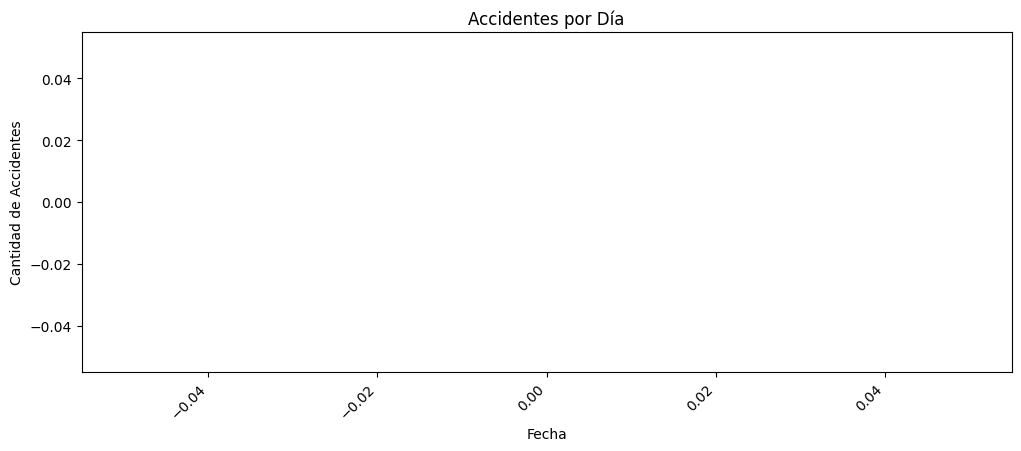

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Cargar archivo CSV
file_path = "/content/datos_combinados_corregidos.csv"
df = pd.read_csv(file_path, sep=None, engine="python", encoding="latin1")

# 🔍 1. Calidad de Datos
print("\n🔹 Información General del Dataset:")
print(df.info())  # Ver tipos de datos y valores nulos

print("\n🔹 Valores Nulos por Columna:")
print(df.isnull().sum())  # Contar valores nulos

print("\n🔹 Columnas Duplicadas (posibles nombres repetidos):")
print(df.columns[df.columns.duplicated()].tolist())  # Ver nombres de columnas duplicados

# 🛠 Limpiar nombres de columnas (eliminar espacios en los nombres)
df.columns = df.columns.str.strip()

# 📅 2. Convertir fechas al formato correcto
fecha_columns = ["F_INSPECCION", "FECHA_CORTE", "FECHA_CORTE1", "FECHA_ACC", "FECHA_PAPELETA", "FECHA_PAPELETA1"]

def convertir_fecha(valor):
    if pd.isna(valor) or valor == "":  # Manejo de valores vacíos
        return None
    try:
        return pd.to_datetime(str(valor), format='%Y%m%d').strftime('%d/%m/%Y')
    except ValueError:
        return valor  # Si falla la conversión, se deja el valor original

for col in fecha_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).apply(convertir_fecha)

# 🚦 3. Análisis de Accidentes
if "FECHA_ACC" in df.columns:
    df["FECHA_ACC"] = pd.to_datetime(df["FECHA_ACC"], errors='coerce')  # Convertir fechas
    accidentes_por_dia = df["FECHA_ACC"].dt.date.value_counts().sort_index()

    plt.figure(figsize=(12, 5))
    accidentes_por_dia.plot(kind="line", color="red", title="Accidentes por Día")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de Accidentes")
    plt.xticks(rotation=45)
    plt.show()




🔹 Total de Fallecidos: 1377
🔹 Total de Heridos: 10671


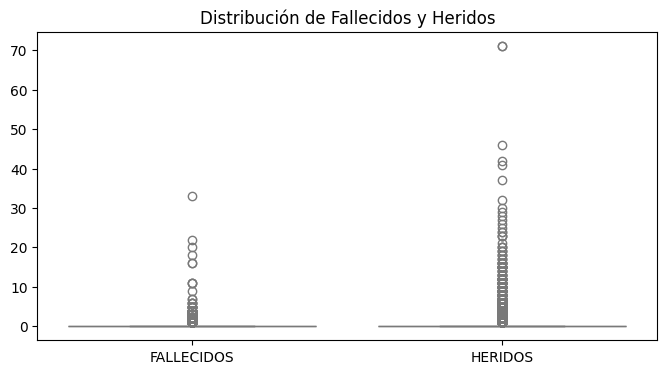

In [40]:
# ⚠️ 4. Análisis de Fatalidades y Heridos
if "FALLECIDOS" in df.columns and "HERIDOS" in df.columns:
    # Convertir las columnas a tipo numérico (ignorar errores para valores no convertibles)
    df["FALLECIDOS"] = pd.to_numeric(df["FALLECIDOS"], errors="coerce").fillna(0).astype(int)
    df["HERIDOS"] = pd.to_numeric(df["HERIDOS"], errors="coerce").fillna(0).astype(int)

    print("\n🔹 Total de Fallecidos:", df["FALLECIDOS"].sum())
    print("🔹 Total de Heridos:", df["HERIDOS"].sum())

    # Gráfico de distribución de fatalidades y heridos
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df[["FALLECIDOS", "HERIDOS"]], palette="coolwarm")
    plt.title("Distribución de Fallecidos y Heridos")
    plt.show()




/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


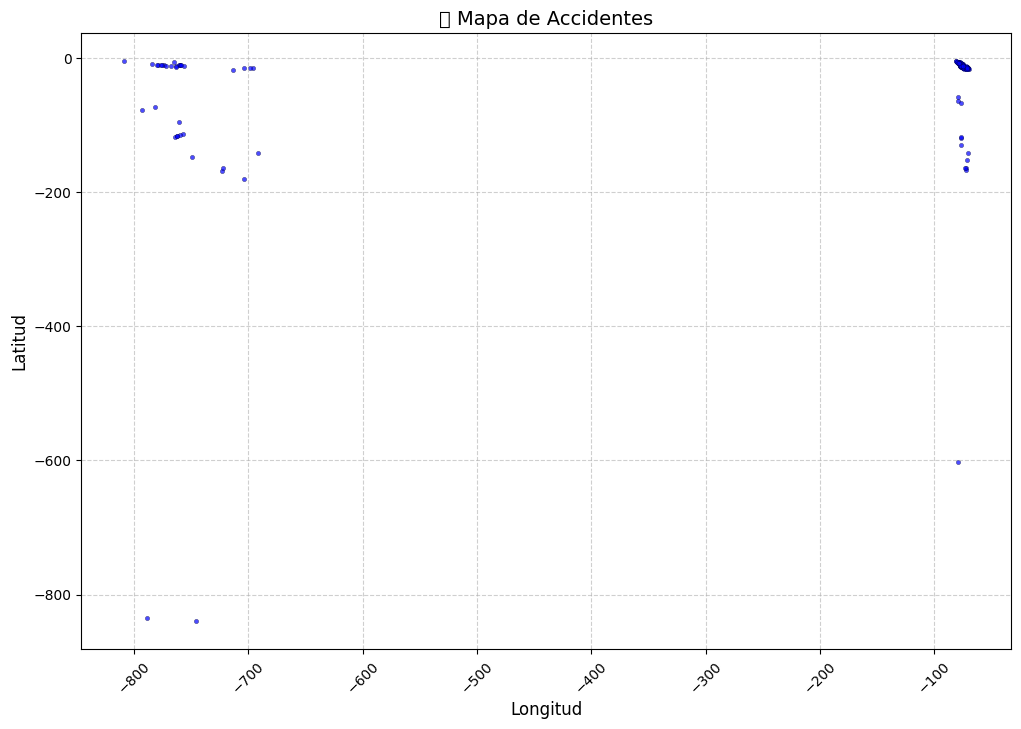

In [41]:
# 🌍 5. Ubicación Geográfica de Accidentes
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que los datos sean numéricos
df["LATITUD"] = pd.to_numeric(df["LATITUD"], errors="coerce")
df["LONGITUD"] = pd.to_numeric(df["LONGITUD"], errors="coerce")

# Filtrar datos válidos (eliminar NaN)
df_map = df.dropna(subset=["LATITUD", "LONGITUD"])

# Crear gráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_map["LONGITUD"], y=df_map["LATITUD"], s=10, alpha=0.7, color="blue", edgecolor="black")

# Etiquetas y título
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)
plt.title("📍 Mapa de Accidentes", fontsize=14)

# Mejorar visualización
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si son muy largas
plt.grid(True, linestyle="--", alpha=0.6)  # Agregar cuadrícula sutil

# Mostrar gráfico
plt.show()



In [45]:
!pip install contextily


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 46.0 MB/s eta 0:00:00


In [46]:
!pip install geopandas

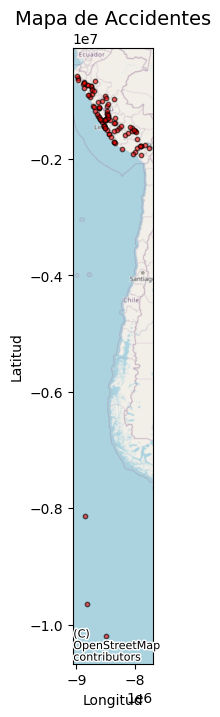

In [48]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Cargar datos (asegúrate de que df tenga columnas 'LATITUD' y 'LONGITUD')
df_map = df[["LATITUD", "LONGITUD"]].dropna()

# Convertir a GeoDataFrame
gdf = gpd.GeoDataFrame(df_map, geometry=gpd.points_from_xy(df_map["LONGITUD"], df_map["LATITUD"]), crs="EPSG:4326")

# Transformar a coordenadas compatibles con contextily (Web Mercator)
gdf = gdf.to_crs(epsg=3857)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar los puntos
gdf.plot(ax=ax, markersize=10, color="red", alpha=0.6, edgecolor="black")

# Agregar mapa base
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Etiquetas
ax.set_title("Mapa de Accidentes", fontsize=14)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

plt.show()


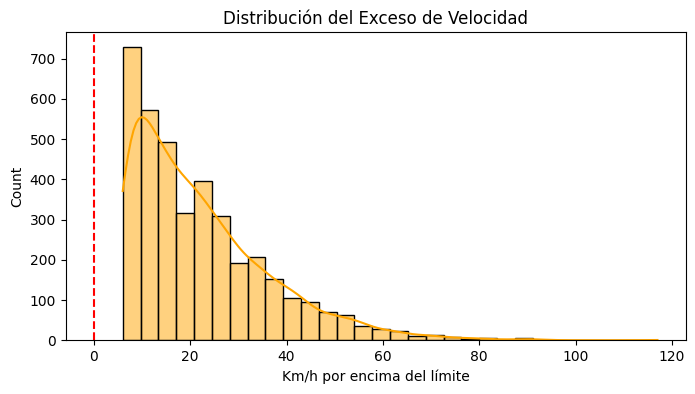


🔹 Vehículos que excedieron el límite: 3832


In [50]:
# 🚗 6. Cumplimiento de Límites de Velocidad
if "VELOCIDAD_DETECTADA" in df.columns and "VELOCIDAD_FISCALIZADA" in df.columns:
    df["EXCESO_VELOCIDAD"] = df["VELOCIDAD_DETECTADA"] - df["VELOCIDAD_FISCALIZADA"]

    plt.figure(figsize=(8, 4))
    sns.histplot(df["EXCESO_VELOCIDAD"], bins=30, kde=True, color="orange")
    plt.axvline(0, color='red', linestyle='dashed')  # Línea de referencia
    plt.title("Distribución del Exceso de Velocidad")
    plt.xlabel("Km/h por encima del límite")
    plt.show()

    print("\n🔹 Vehículos que excedieron el límite:", (df["EXCESO_VELOCIDAD"] > 0).sum())



In [51]:
# 📊 7. Inspecciones y Papeletas
if "F_INSPECCION" in df.columns and "FECHA_PAPELETA" in df.columns:
    print("\n🔹 Inspecciones realizadas:", df["F_INSPECCION"].count())
    print("🔹 Papeletas emitidas:", df["FECHA_PAPELETA"].count())

# 🎯 Guardar el DataFrame procesado
df.to_csv("datos_procesados.csv", index=False)
print("\n✅ Datos procesados guardados en 'datos_procesados.csv'")


🔹 Inspecciones realizadas: 886
🔹 Papeletas emitidas: 3832

✅ Datos procesados guardados en 'datos_procesados.csv'


In [52]:
df = pd.read_csv("datos_procesados.csv", low_memory=False)

# Forzar a que las columnas predictoras sean numéricas (ignorar errores)
columnas_predictivas = ['VELOCIDAD_DETECTADA', 'LONGITUD', 'LATITUD']
df[columnas_predictivas] = df[columnas_predictivas].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores no numéricos convertidos a NaN
df = df.dropna(subset=columnas_predictivas)


In [53]:
print(df[columnas_predictivas].dtypes)  # Verifica los tipos de datos
print(df[columnas_predictivas].head(10))  # Muestra ejemplos de datos


VELOCIDAD_DETECTADA    float64
LONGITUD               float64
LATITUD                float64
dtype: object
    VELOCIDAD_DETECTADA  LONGITUD  LATITUD
12                 90.0   -76.628  -12.714
23                 64.0  -749.459 -148.253
34                 67.0   -75.877  -13.934
44                 82.0   -70.822  -15.708
53                 73.0   -76.134  -10.858
56                 44.0   -71.871  -16.683
57                 48.0  -696.213  -14.733
58                 63.0   -76.571  -12.787
64                 45.0   -80.613   -5.406
68                 63.0   -76.498  -11.895


In [55]:
print(df['ACCIDENTE'].value_counts())



ACCIDENTE
0    142
Name: count, dtype: int64


In [56]:
print(df['FECHA_ACC'].unique()[:10])  # Muestra los primeros 10 valores únicos
print(df['FECHA_ACC'].isna().sum(), "valores nulos")
print(df['FECHA_ACC'].dtype, "tipo de dato")


[nan]
142 valores nulos
float64 tipo de dato


In [57]:
df = pd.read_csv("datos_procesados.csv", dtype=str)  # Leer como texto para evitar errores
print(df.head())  # Ver primeras filas


   NRO N_DOCUMENTO F_INSPECCION      TIPO_ENTIDAD       REGION  \
0  1.0  6603000090   03/10/2022  ESC. CONDUCTORES     AREQUIPA   
1  2.0  6611000159   03/10/2022  ESC. CONDUCTORES        CUSCO   
2  3.0  6611000160   03/10/2022  ESC. CONDUCTORES        CUSCO   
3  4.0  6601000439   03/10/2022  ESC. CONDUCTORES  LIMA-CALLAO   
4  5.0  6614000065   03/10/2022  ESC. CONDUCTORES      HUANUCO   

        EXPEDIENTE FECHA_CORTE       FECHA   HORA DEPARTAMENTO  ...  \
0  008908-2022-050  20211222.0  20200101.0   5:40         LIMA  ...   
1  008911-2022-050  20211222.0  20200101.0  16:30    CAJAMARCA  ...   
2  008912-2022-050  20211222.0  20200101.0   7:45        PASCO  ...   
3  008918-2022-050  20211222.0  20200101.0  18:30    CAJAMARCA  ...   
4  008921-2022-050  20211222.0  20200101.0  18:40         LIMA  ...   

  FECHA_PAPELETA1 REGION.1         CARRETERA.1       LATITUD.1  \
0      31/10/2019     LIMA  Panamericana Norte  -1.145.944.444   
1      31/10/2019     LIMA  Panamericana Nor

In [58]:
df = pd.read_csv("datos_procesados.csv", parse_dates=['FECHA_ACC'])
print(df['FECHA_ACC'].dtype)  # Debe ser datetime64 si las fechas se cargaron bien


datetime64[ns]


In [59]:
import numpy as np

# Generar 10 filas con accidentes (ACCIDENTE=1)
datos_falsos = pd.DataFrame({
    'VELOCIDAD_DETECTADA': np.random.randint(40, 120, 10),
    'LONGITUD': np.random.uniform(-75, -70, 10),
    'LATITUD': np.random.uniform(-10, -5, 10),
    'ACCIDENTE': 1
})

# Agregar los datos falsos al dataframe original
df = pd.concat([df, datos_falsos], ignore_index=True)

print(df['ACCIDENTE'].value_counts())  # Ahora debe haber al menos algunos '1'


ACCIDENTE
0    3832
1      10
Name: count, dtype: int64


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(y_train.value_counts())  # Para verificar que ahora hay 0s

ACCIDENTE
0    113
Name: count, dtype: int64


In [66]:
print(y_train.value_counts())


ACCIDENTE
0    113
Name: count, dtype: int64


In [67]:
# Obtener todos los casos de accidentes (1)
accidentes = df[df['ACCIDENTE'] == 1]

# Obtener una muestra de datos sin accidentes (0), pero en menor cantidad
no_accidentes = df[df['ACCIDENTE'] == 0].sample(n=len(accidentes) * 5, random_state=42)

# Concatenar ambos
df_balanceado = pd.concat([accidentes, no_accidentes])

# Repetir la división de datos con la nueva distribución
X = df_balanceado[columnas_predictivas]
y = df_balanceado[columna_objetivo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(y_train.value_counts())  # Ahora debería haber 1s y 0s


ACCIDENTE
0    40
1     8
Name: count, dtype: int64


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [73]:
print(X_train.dtypes)



VELOCIDAD_DETECTADA    float64
LONGITUD                object
LATITUD                 object
dtype: object


In [75]:
# Convertir LONGITUD y LATITUD a float
X_train["LONGITUD"] = pd.to_numeric(X_train["LONGITUD"], errors="coerce")
X_train["LATITUD"] = pd.to_numeric(X_train["LATITUD"], errors="coerce")

X_test["LONGITUD"] = pd.to_numeric(X_test["LONGITUD"], errors="coerce")
X_test["LATITUD"] = pd.to_numeric(X_test["LATITUD"], errors="coerce")

# Revisar si quedaron valores NaN después de la conversión
print(X_train.isna().sum())


VELOCIDAD_DETECTADA     0
LONGITUD               38
LATITUD                32
dtype: int64


In [76]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)


In [77]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())  # Ahora debe estar balanceado


ACCIDENTE
0    40
1    40
Name: count, dtype: int64


In [78]:
# Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.18      1.00      0.31         2

    accuracy                           0.25        12
   macro avg       0.59      0.55      0.24        12
weighted avg       0.86      0.25      0.20        12



In [95]:
df["LONGITUD"] = pd.to_numeric(df["LONGITUD"], errors="coerce")
df["LATITUD"] = pd.to_numeric(df["LATITUD"], errors="coerce")


In [81]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Normalizar los datos
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Definir el modelo
model = RandomForestClassifier(random_state=42)

# Definir el espacio de hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [None, 10, 20],  # Profundidad máxima
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Mínimo de muestras en una hoja
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Entrenar la búsqueda de hiperparámetros
grid_search.fit(X_train_resampled, y_train_resampled)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Imprimir mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Evaluar en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Reporte de métricas
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.18      1.00      0.31         2

    accuracy                           0.25        12
   macro avg       0.59      0.55      0.24        12
weighted avg       0.86      0.25      0.20        12



In [88]:
import pandas as pd

# Convertir todas las columnas a numéricas (si es posible)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Verifica si hay valores no convertidos (NaN)
print(X_train.dtypes)
print(X_train.isna().sum())  # Muestra cuántos valores NaN quedaron


NRO                                   float64
N_DOCUMENTO                           float64
F_INSPECCION                          float64
TIPO_ENTIDAD                          float64
REGION                                float64
EXPEDIENTE                            float64
FECHA_CORTE                           float64
FECHA                                 float64
HORA                                  float64
DEPARTAMENTO                          float64
CODIGO_VÍA                            float64
KILOMETRO                             float64
MODALIDAD                             float64
FALLECIDOS                            float64
HERIDOS                               float64
FECHA_CORTE1                          float64
NRO_REPORTE                           float64
FECHA_ACC                               int64
HORA_ACC                              float64
MODALIDAD_ACC                         float64
CANT_FALLECIDOS                       float64
CANT_HERIDOS                      

In [89]:
import pandas as pd

# Intentar convertir TODAS las columnas a numéricas
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Verificar cuántos valores faltantes hay después de la conversión
print(X_train.isna().sum())


NRO                                   2354
N_DOCUMENTO                           2499
F_INSPECCION                          3073
TIPO_ENTIDAD                          3073
REGION                                3073
EXPEDIENTE                            3073
FECHA_CORTE                            479
FECHA                                    8
HORA                                  3073
DEPARTAMENTO                          3073
CODIGO_VÍA                            3073
KILOMETRO                               37
MODALIDAD                             3073
FALLECIDOS                              11
HERIDOS                                 16
FECHA_CORTE1                             8
NRO_REPORTE                           3073
FECHA_ACC                                0
HORA_ACC                              3073
MODALIDAD_ACC                         3073
CANT_FALLECIDOS                          8
CANT_HERIDOS                             8
LATITUD                               2821
LONGITUD   

In [90]:
X_train = X_train.dropna(axis=1, thresh=int(0.5 * len(X_train)))


In [91]:
X_train = X_train.fillna(X_train.mean())


In [92]:
X_train = X_train.fillna(X_train.mode().iloc[0])


In [93]:
y_train = y_train.loc[X_train.index]


In [98]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())  # Verificar balance de clases


ACCIDENTE
0    3065
1    3065
Name: count, dtype: int64


In [103]:
# Asegurar que X_test tenga las mismas columnas que X_train_resampled
X_test = X_test[X_train_resampled.columns]


In [105]:
import numpy as np

# Reemplazar 'N.I.' y otros valores problemáticos con NaN
X_test.replace('N.I.', np.nan, inplace=True)

# Si hay más valores extraños, agrégalos aquí:
# X_test.replace(['OtroValorProblemático1', 'OtroValorProblemático2'], np.nan, inplace=True)


In [106]:
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [107]:
X_test.fillna(X_test.mean(), inplace=True)


In [108]:
X_test.dropna(inplace=True)


In [109]:
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       767
           1       0.00      0.00      0.00         2

    accuracy                           1.00       769
   macro avg       0.50      0.50      0.50       769
weighted avg       0.99      1.00      1.00       769



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [110]:
print(y_train.value_counts())


ACCIDENTE
0    3065
1       8
Name: count, dtype: int64


In [111]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print(y_train_bal.value_counts())  # Verifica que ambas clases tengan igual cantidad


ACCIDENTE
0    3065
1    3065
Name: count, dtype: int64


In [112]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)


In [113]:
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidad de clase 1
y_pred = (y_prob > 0.3).astype(int)  # Reducir umbral a 30%

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       767
           1       1.00      1.00      1.00         2

    accuracy                           1.00       769
   macro avg       1.00      1.00      1.00       769
weighted avg       1.00      1.00      1.00       769



In [114]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
modelo.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# 1️⃣ Matriz de Confusión
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Accidente", "Accidente"], yticklabels=["No Accidente", "Accidente"])
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.title("Matriz de Confusión")
    plt.show()

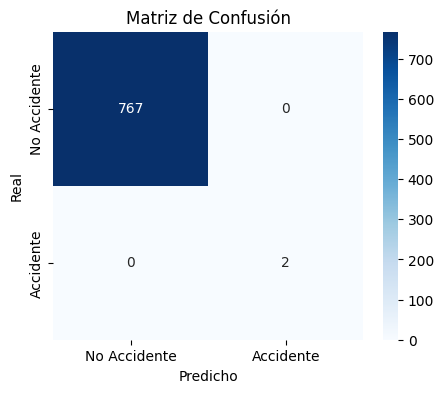

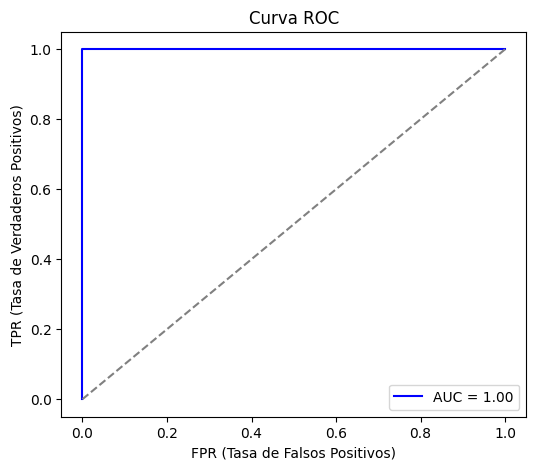

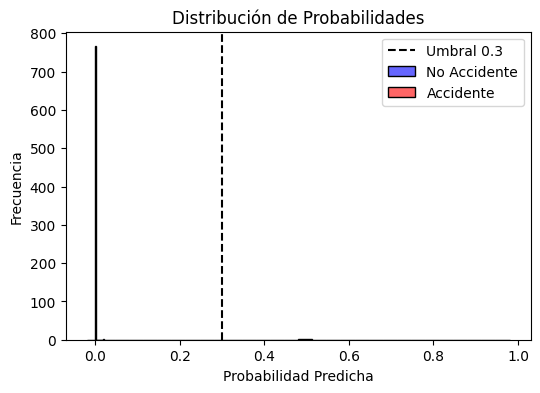

In [116]:
# 2️⃣ Curva ROC y AUC
def plot_roc_curve(y_test, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("FPR (Tasa de Falsos Positivos)")
    plt.ylabel("TPR (Tasa de Verdaderos Positivos)")
    plt.title("Curva ROC")
    plt.legend()
    plt.show()

# 3️⃣ Distribución de Probabilidades
def plot_probability_distribution(y_test, y_prob):
    plt.figure(figsize=(6,4))
    sns.histplot(y_prob[y_test == 0], bins=30, color="blue", label="No Accidente", alpha=0.6)
    sns.histplot(y_prob[y_test == 1], bins=30, color="red", label="Accidente", alpha=0.6)
    plt.axvline(0.3, color="black", linestyle="--", label="Umbral 0.3")
    plt.xlabel("Probabilidad Predicha")
    plt.ylabel("Frecuencia")
    plt.title("Distribución de Probabilidades")
    plt.legend()
    plt.show()

# Ejecutar los gráficos
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_prob)
plot_probability_distribution(y_test, y_prob)